# Центральная предельная теорема своими руками

### Исследование распределения Парето

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import norm
%matplotlib inline

In [170]:
#генерит выборку по Парето, объемом 1000, в качестве аргумента b = 2.62
b = 2.62
samples = pareto.rvs(b, size = 1000)

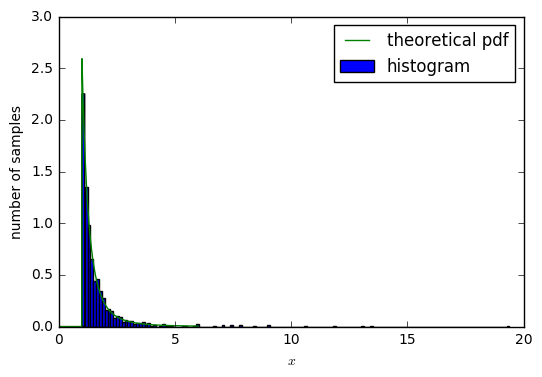

In [171]:
#строится гистограмма выборки и теоретическая плотность рапределени 

plt.hist(samples, bins=150, normed=True, label='histogram')
plt.ylabel('number of samples')
plt.xlabel('$x$')

x = np.linspace(0,6,1000)
pdf = pareto.pdf(x, b)
plt.plot(x, pdf, label='theoretical pdf', alpha=1)
plt.legend()


### Оценить распределение выборочного среднего случайной величины, заданной распределением Парето

Математическое ожидание для X, распределенной по з-ну Парето, определено для b > 1:
EX = b * xm / (b - 1),
т.к xm = 1 => EX = b / (b - 1)

Дисперсия определена для b > 2:
DX = xm^2 * b / ((b - 1)^2 * (b - 2)),
т.к. xm = 1 => DX = b / ((b - 1)^2 * (b - 2)),

ex - мат.ожидание исходной Х, распределенной по Парето
dx - дисперсия исходной Х
dx_av - дисперсия выборочного среднего

### Далее для объемов n = 5, 10, 50, 100, 200 построить гистограммы выборочных средних, а также плотности соответствующих нормальных распределений

При n = 5:
ex = 1.61728395062
dx = 1.61019907469
dx_av = 0.32203981


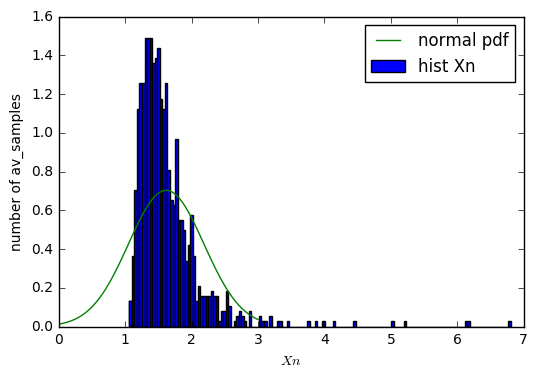

In [175]:
n = 5

#функция возвращает выбрку средних по заданому объёму n
def calcParetoAverageSample(n):
    av_sample = []
    for i in range(0, 1000):
        samp = pareto.rvs(b, size=n)
        av = round(np.average(samp), 8)
        av_sample.append(av);
    return av_sample    

ex = b / (b - 1)
dx = np.power((1 / (b - 1)), 2) * (b / (b - 2))
dx_av = round(dx / n, 8)

print 'При n = 5:'
print 'ex =', ex
print 'dx =', dx
print 'dx_av =', dx_av

plt.hist(calcParetoAverageSample(5), bins=150, normed=True, label="hist Xn")
plt.ylabel('number of av_samples')
plt.xlabel('$Xn$')   

x = np.linspace(0,3,100)
norm_dens = norm.pdf(x, ex, np.sqrt(dx_av))
plt.plot(x, norm_dens, label="normal pdf")
plt.legend()

При n = 10:
ex = 1.61728395062
dx = 1.61019907469
dx_av = 0.16101991


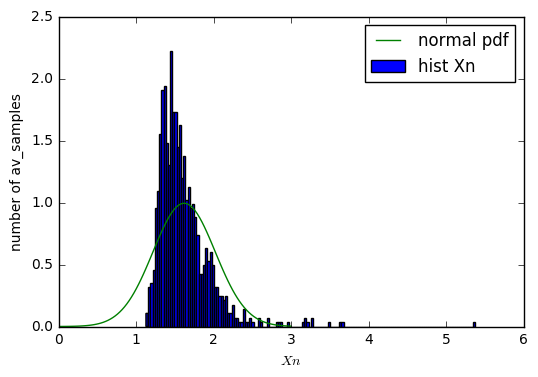

In [178]:
n = 10
dx_av = round(dx / n, 8)

print 'При n = 10:'
print 'ex =', ex
print 'dx =', dx
print 'dx_av =', dx_av

plt.hist(calcParetoAverageSample(10), bins=150, normed=True, label="hist Xn")
plt.ylabel('number of av_samples')
plt.xlabel('$Xn$')  

x = np.linspace(0,3,100)
norm_dens = norm.pdf(x, ex, np.sqrt(dx_av))
plt.plot(x, norm_dens, label="normal pdf")
plt.legend()

#### 3.) n = 50

При n = 50:
ex = 1.61728395062
dx = 1.61019907469
dx_av = 0.03220398


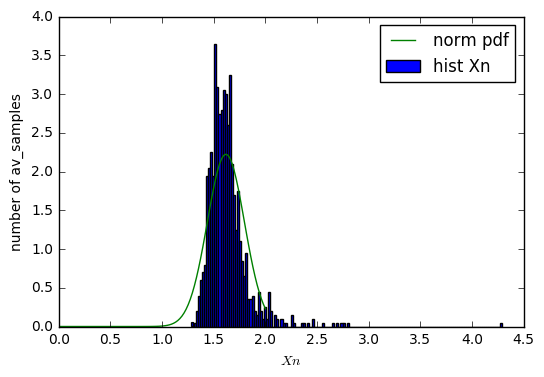

In [183]:
n = 50
dx_av = round(dx / n, 8)

print 'При n = 50:'
print 'ex =', ex
print 'dx =', dx
print 'dx_av =', dx_av

plt.hist(calcParetoAverageSample(n), bins=150, normed=True, label="hist Xn")
plt.ylabel('number of av_samples')
plt.xlabel('$Xn$')

x = np.linspace(0,2,100)
norm_dens = norm.pdf(x, ex, np.sqrt(dx_av))
plt.plot(x, norm_dens, label="norm pdf")
plt.legend()

#### 4.) n = 100

При n = 100:
ex = 1.61728395062
dx = 1.61019907469
dx_av = 0.01610199


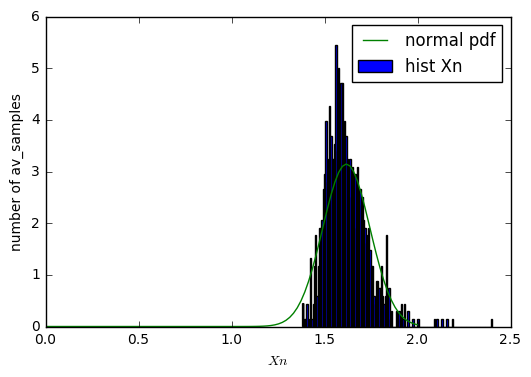

In [185]:
n = 100
dx_av = round(dx / n, 8)

print 'При n = 100:'
print 'ex =', ex
print 'dx =', dx
print 'dx_av =', dx_av

plt.hist(calcParetoAverageSample(n), bins=150, normed=True, label="hist Xn")
plt.ylabel('number of av_samples')
plt.xlabel('$Xn$')

x = np.linspace(0,2,100)
norm_dens = norm.pdf(x, ex, np.sqrt(dx_av))
plt.plot(x, norm_dens, label="normal pdf")
plt.legend()

#### 5.) n=200

При n = 200:
ex = 1.61728395062
dx = 1.61019907469
dx_av = 0.008051


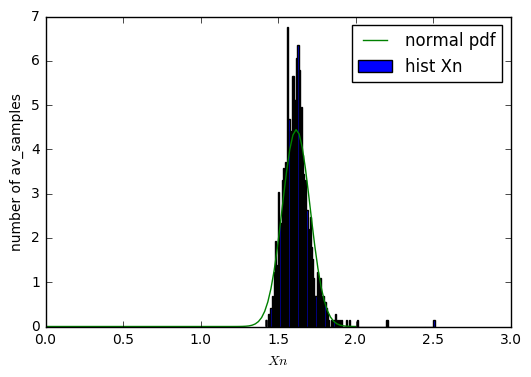

In [187]:
n = 200
dx_av = round(dx / n, 8)

print 'При n = 200:'
print 'ex =', ex
print 'dx =', dx
print 'dx_av =', dx_av

plt.hist(calcParetoAverageSample(n), bins=150, normed=True, label="hist Xn")
plt.ylabel('number of av_samples')
plt.xlabel('$Xn$')

x = np.linspace(0,2,100)
norm_dens = norm.pdf(x, ex, np.sqrt(dx_av))
plt.plot(x, norm_dens, label="normal pdf")
plt.legend()

### Вывод: 
Из проведенных вычислений и графиков видно, что при увеличении n распределение выборочных средних стремится к соответствующему нормальному распределению. Но как было замечено в одной из лекций, ЦПТ хорошо работает, когда исходное распределение не слишком скошено. Распределение Парето, скорее, относится к скошенным, поэтому мы видим, что даже при больших n наблюдается погрешность в приближении к нормальному распределению